In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import soundfile as sf
import librosa.display

### 1. Mel filterbank (1 point)

#### a) Load the given audio file

In [10]:
audio_path = r'c:\Users\Mihai\Downloads\Exercise 5 audio processing\audio.wav'
s, sr = librosa.load(audio_path, sr=None)

#### b) Create a mel filterbank using librosa

In [11]:
hop_length = 256  # Assuming 50% overlap
frame_length = 512
frames = librosa.util.frame(s_preemphasized, frame_length=frame_length, hop_length=hop_length).T
n_frames = frames.shape[0]

#### c) Plot the mel filterbank

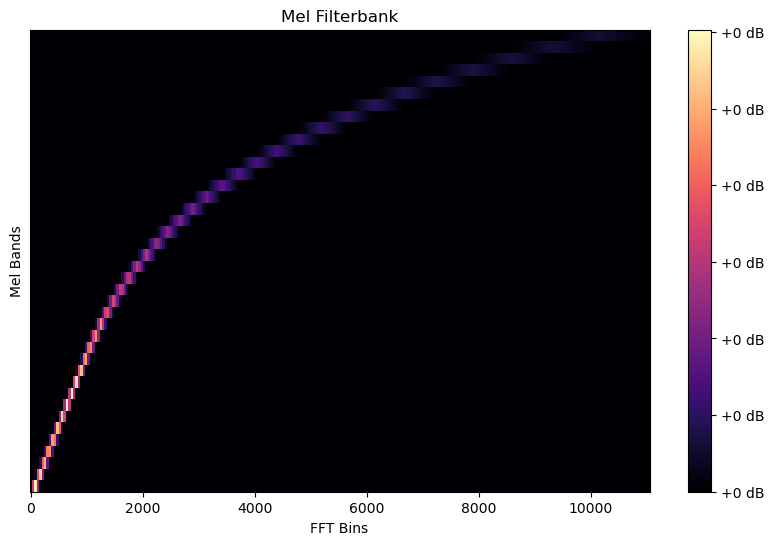

In [12]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_filterbank, x_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Filterbank')
plt.xlabel('FFT Bins')
plt.ylabel('Mel Bands')
plt.show()

#### Report your observations

- The mel scale focuses on lower frequencies, which is evident as the filters are denser at the start of the frequency axis and become sparser toward higher frequencies.
- The curved pattern reflects the mel scale's nonlinear relationship to the frequency (closer to logarithmic than linear).

### 2. MFCC (1 point)

#### a) Pre-emphasis the audio signal

In [13]:
pre_emphasis = 0.97
s_ = np.append(s[0], s[1:] - pre_emphasis * s[:-1])

#### b) Implement a stft loop for each frame 

In [14]:
hop_length = 256  # Assuming 50% overlap
frame_length = 512
frames = librosa.util.frame(s_preemphasized, frame_length=frame_length, hop_length=hop_length).T
n_frames = frames.shape[0]

# Initialize matrices
power_spectro = np.zeros((n_fft // 2 + 1, n_frames), dtype=np.float32)
mel_spectro = np.zeros((n_mel, n_frames), dtype=np.float32)
mfccs = np.zeros((n_mel, n_frames), dtype=np.float32)

for i in range(n_frames):
    s_seg = frames[i, :]
    s_win_seg = s_seg * signal.hamming(frame_length)  # Window each frame
    spectrum = np.abs(fft(s_win_seg, n=n_fft))[:n_fft // 2 + 1]  # FFT and take magnitude
    power_spectrum = (1.0 / n_fft) * (spectrum ** 2)  # Power spectrum
    power_spectro[:, i] = power_spectrum
    mel_spectrum = np.dot(mel_filterbank, power_spectrum)  # Mel spectrum
    mel_spectro[:, i] = mel_spectrum
    log_mel_spectrum = 20 * np.log10(np.maximum(mel_spectrum, 1e-10))  # Logarithmic mel spectrum
    mfcc = dct(log_mel_spectrum, type=2, axis=-1, norm='ortho')[:n_mel]  # Apply DCT
    mfccs[:, i] = mfcc
 

C:\Users\Mihai\AppData\Local\Temp\ipykernel_14644\2156018649.py:13: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  s_win_seg = s_seg * signal.hamming(frame_length)  # Window each frame


#### c.1) Plot logarithmic power spectrogram

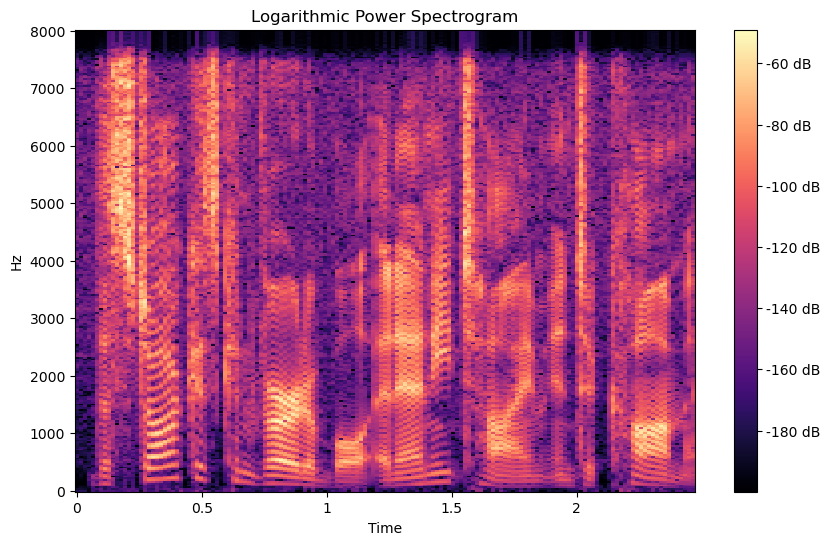

In [15]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(20 * np.log10(power_spectro + 1e-10), sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Logarithmic Power Spectrogram')
plt.show()

#### c.2) Plot mel spectrogram

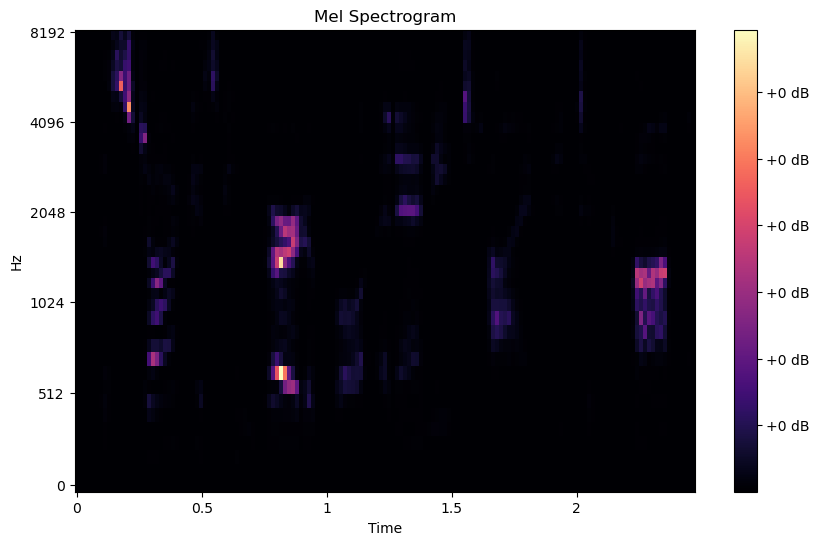

In [16]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectro, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

#### c.3) Plot logarithmic mel spectrogram

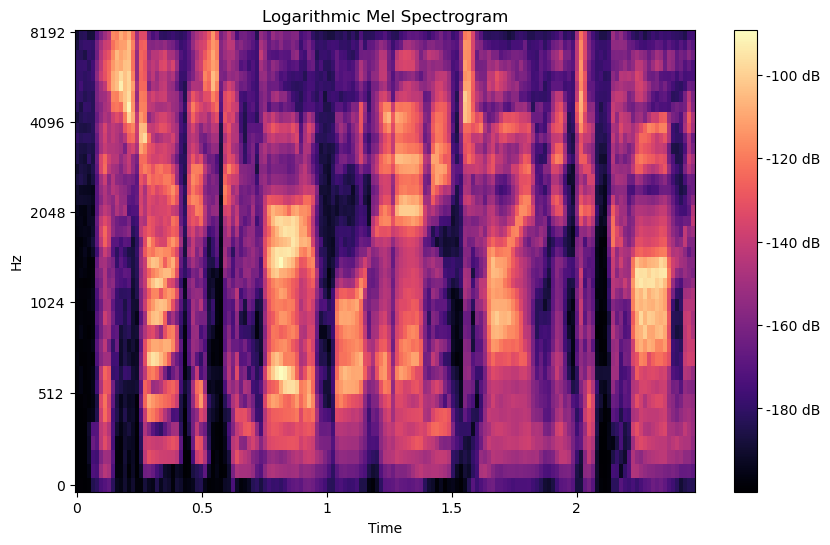

In [17]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(20 * np.log10(mel_spectro + 1e-10), sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Logarithmic Mel Spectrogram')
plt.show()

#### c.4) Plot MFCC

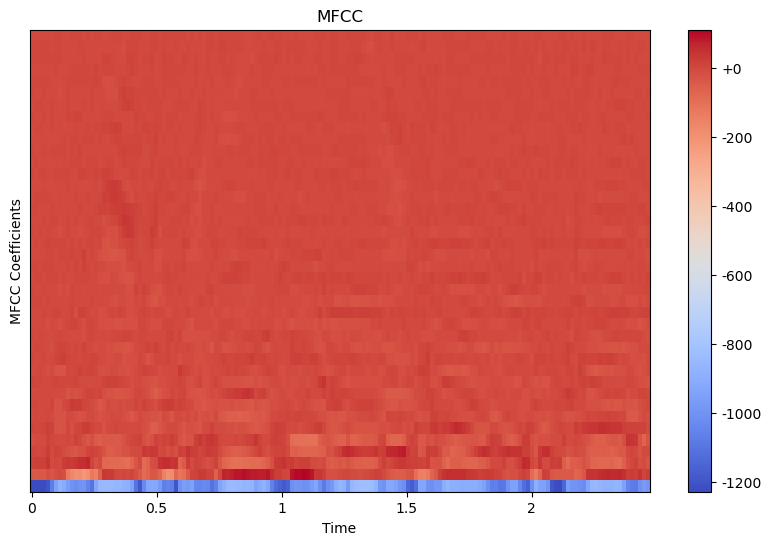

In [18]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('MFCC')
plt.ylabel('MFCC Coefficients')
plt.show()

#### d) Implement MFCC using librosa

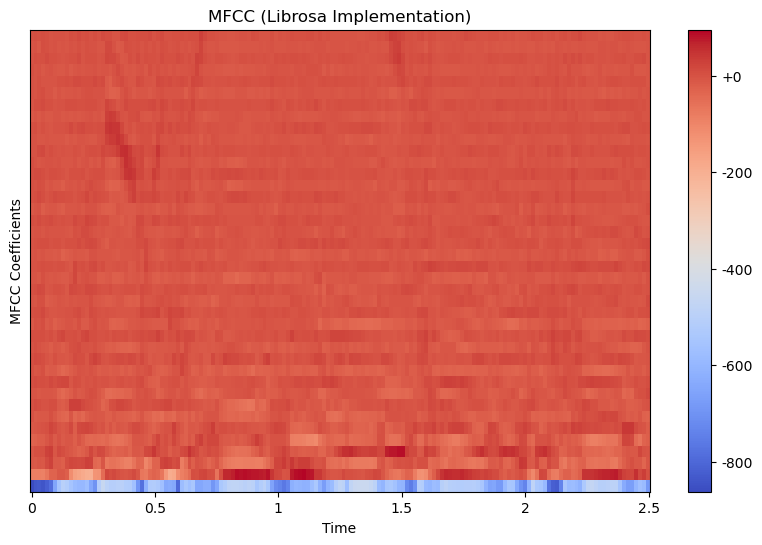

In [19]:
mfccs_librosa = librosa.feature.mfcc(y=s_preemphasized, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mel)

# Plot MFCC (librosa)
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs_librosa, sr=sr, hop_length=hop_length, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('MFCC (Librosa Implementation)')
plt.ylabel('MFCC Coefficients')
plt.show()

#### Report your observations

- MFCCs (both custom and Librosa) compact high-dimensional spectral information into 40 coefficients per frame, capturing the spectral shape while reducing complexity and retaining perceptual features.
- Vertical stripes in MFCC graphs show the temporal evolution of spectral features, with smooth transitions indicating consistent audio content and abrupt changes highlighting distinct sounds or phonemes.
- Lower MFCC coefficients (top of y-axis) dominate, reflecting low-frequency emphasis, while higher coefficients (bottom) are smaller, de-emphasizing high-frequency noise.
- Custom and Librosa MFCC graphs align closely, validating the custom implementation's accuracy; minor differences stem from algorithmic nuances.

### Bonus problem: Implement your own mel filterbank.